**1. Import a dataset & Clean the data as per requirement**

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'
df = pd.read_csv(url)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

**2. EDA to narrow down the relevant features**

In [85]:
# Create a function to visualize the relationship between scale & categorical variable
def boxplot(y):
  plt.figure(figsize=(10,6))
  sns.boxplot(x='RainTomorrow', y=y, data=df)
  plt.show()

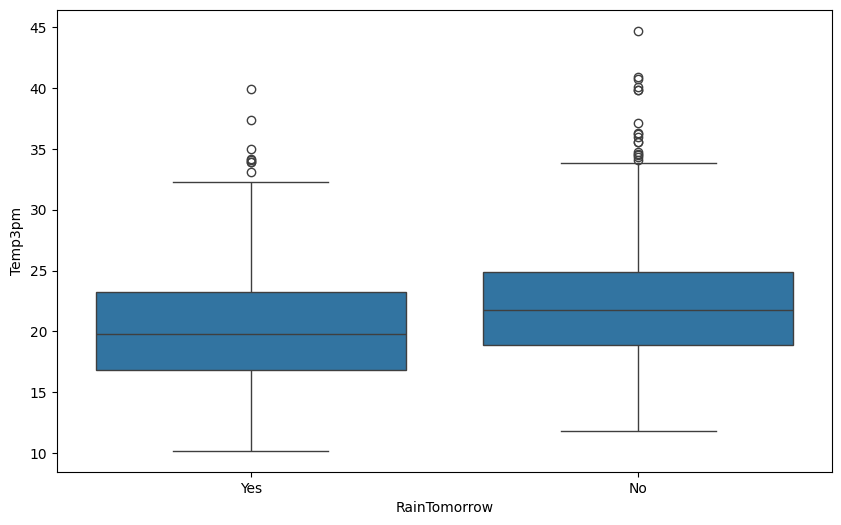

In [86]:
boxplot('Temp3pm')

In [87]:
# Create anova to check the significance of features
from scipy.stats import f_oneway
feature_list = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

for feature in feature_list:
  data = df[[feature, 'RainTomorrow']]
  data_grouped = data.groupby('RainTomorrow')
#data_grouped.head()
  f_stat, p_val = f_oneway(data_grouped.get_group('Yes')[feature], data_grouped.get_group('No')[feature])
  if p_val < 0.05:
    print(f'{feature} is the signficant feature with p-value of {p_val}')
  else:
    print(f'{feature} is not the signficant feature with p-value of {p_val}')

MinTemp is the signficant feature with p-value of 2.1147080245250035e-06
MaxTemp is the signficant feature with p-value of 1.765183268690319e-18
Rainfall is the signficant feature with p-value of 3.3652675425600066e-67
Evaporation is the signficant feature with p-value of 5.9392704773974894e-05
Sunshine is the signficant feature with p-value of 1.8637901308653167e-235
WindGustSpeed is the signficant feature with p-value of 6.48755463581952e-17
WindSpeed9am is the signficant feature with p-value of 0.0001773389845283773
WindSpeed3pm is not the signficant feature with p-value of 0.4348837596441123
Humidity9am is the signficant feature with p-value of 3.980762303567673e-87
Humidity3pm is the signficant feature with p-value of 5.007333853238832e-186
Pressure9am is not the signficant feature with p-value of 0.05089044052015291
Pressure3pm is not the signficant feature with p-value of 0.6545135880008097
Cloud9am is the signficant feature with p-value of 1.5965030192789822e-88
Cloud3pm is the

In [88]:
#Dropping non-significant features from the dataframe
df = df.drop(['WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  Humidity9am    3271 non-null   int64  
 12  Humidity3pm    3271 non-null   int64  
 13  Cloud9am       3271 non-null   int64  
 14  Cloud3pm       3271 non-null   int64  
 15  Temp3pm        3271 non-null   float64
 16  RainToday      3271 non-null   object 
 17  RainTomorrow   3271 non-null   object 
dtypes: float

In [89]:
# create a function for plotting a frequency chart to check the relationship between two categorical variables
def frequency_chart(x, y):
  plt.figure(figsize=(12,6))
  sns.countplot(x=x, hue=y, data=df)
  plt.show()

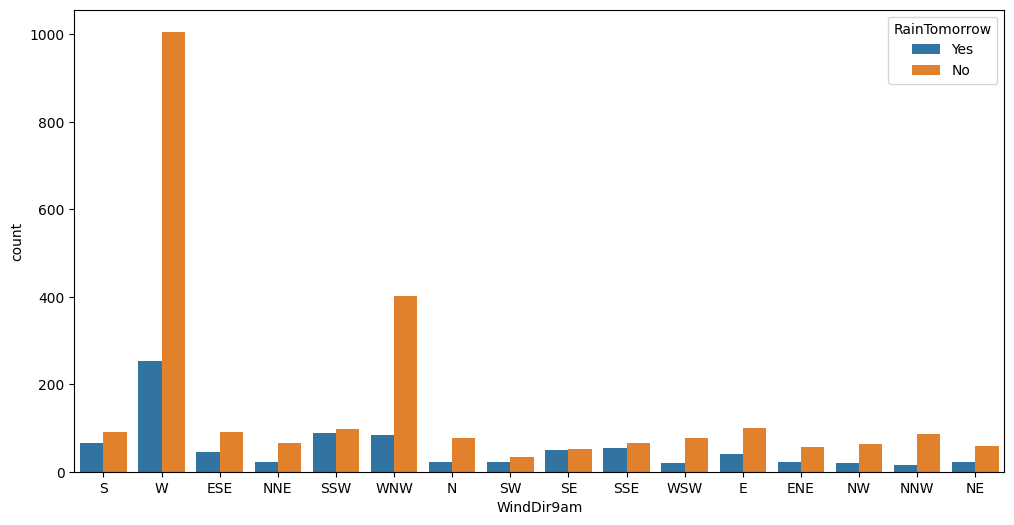

In [90]:
frequency_chart('WindDir9am', 'RainTomorrow')

In [91]:
# prompt: create a function to test the signifcance using chi2 test

import pandas as pd
from scipy.stats import chi2_contingency

def chi_square_test(x):
  crosstab = pd.crosstab(df[x], df['RainTomorrow'])
  chi2, p, dof, expected = chi2_contingency(crosstab)
  if p < 0.05:
    print(f'{x} and RainTomorrow are dependent with p-value of {p}')
  else:
    print(f'{x} and RainTomorrow are independent with p-value of {p}')


In [92]:
chi_square_test('RainToday')
#After checking, all the categorical features are significant to consider the classification model

RainToday and RainTomorrow are dependent with p-value of 7.267641561413941e-87


In [93]:
# dummy variables required for WindGustDir, WindtDir9am, WindDir3pm
df_pp = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 63 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             3271 non-null   object 
 1   MinTemp          3271 non-null   float64
 2   MaxTemp          3271 non-null   float64
 3   Rainfall         3271 non-null   float64
 4   Evaporation      3271 non-null   float64
 5   Sunshine         3271 non-null   float64
 6   WindGustSpeed    3271 non-null   int64  
 7   WindSpeed9am     3271 non-null   int64  
 8   Humidity9am      3271 non-null   int64  
 9   Humidity3pm      3271 non-null   int64  
 10  Cloud9am         3271 non-null   int64  
 11  Cloud3pm         3271 non-null   int64  
 12  Temp3pm          3271 non-null   float64
 13  RainToday        3271 non-null   object 
 14  RainTomorrow     3271 non-null   object 
 15  WindGustDir_E    3271 non-null   bool   
 16  WindGustDir_ENE  3271 non-null   bool   
 17  WindGustDir_ES

In [94]:
df_pp['RainTomorrow'].replace('Yes', 1, inplace=True)
df_pp['RainTomorrow'].replace('No', 0, inplace=True)
df_pp['RainToday'].replace('Yes', 1, inplace=True)
df_pp['RainToday'].replace('No', 0, inplace=True)
df_pp = df_pp.drop(['Date'], axis=1)
df_pp = df_pp.astype('float64')

In [95]:
y = df_pp['RainTomorrow']
x = df_pp.drop(['RainTomorrow'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [96]:
x_train.shape

(2616, 61)

In [97]:
x_test.shape

(655, 61)

**3. Support Vector Machine Classification model**

In [98]:
# Create SVM classifcation model
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score
svm_acc = accuracy_score(y_test, y_pred)
svm_acc

0.8396946564885496

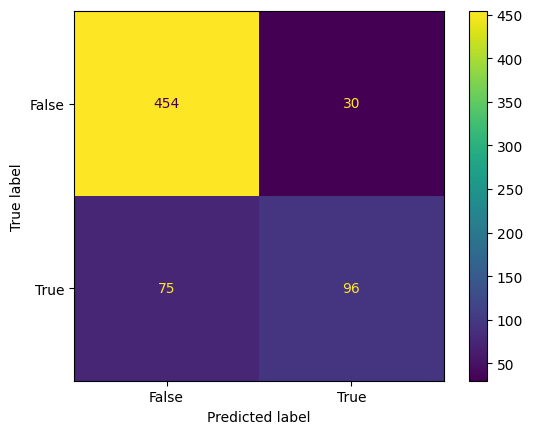

In [100]:
#plot a confusiont matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics as metrics
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

**4. Decision Tree Model Classifcation**

In [101]:
#Create a decision tree model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtc.fit(x_train, y_train)
y_pred1 = dtc.predict(x_test)
dt_acc = accuracy_score(y_test, y_pred1)
dt_acc

0.8274809160305343

[Text(0.49107142857142855, 0.9, 'x[4] <= -0.477\nentropy = 0.825\nsamples = 2616\nvalue = [1938, 678]'),
 Text(0.26785714285714285, 0.7, 'x[8] <= 1.339\nentropy = 0.988\nsamples = 805\nvalue = [351, 454]'),
 Text(0.14285714285714285, 0.5, 'x[2] <= -0.105\nentropy = 0.985\nsamples = 576\nvalue = [330, 246]'),
 Text(0.07142857142857142, 0.3, 'x[8] <= 0.541\nentropy = 0.897\nsamples = 399\nvalue = [274, 125]'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.769\nsamples = 227\nvalue = [176, 51]'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.986\nsamples = 172\nvalue = [98, 74]'),
 Text(0.21428571428571427, 0.3, 'x[3] <= -1.406\nentropy = 0.9\nsamples = 177\nvalue = [56, 121]'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.811\nsamples = 16\nvalue = [12, 4]'),
 Text(0.25, 0.1, 'entropy = 0.846\nsamples = 161\nvalue = [44, 117]'),
 Text(0.39285714285714285, 0.5, 'x[6] <= 0.628\nentropy = 0.442\nsamples = 229\nvalue = [21, 208]'),
 Text(0.35714285714285715, 0.3, 'x[8] <= 1.524\nentropy = 0.56

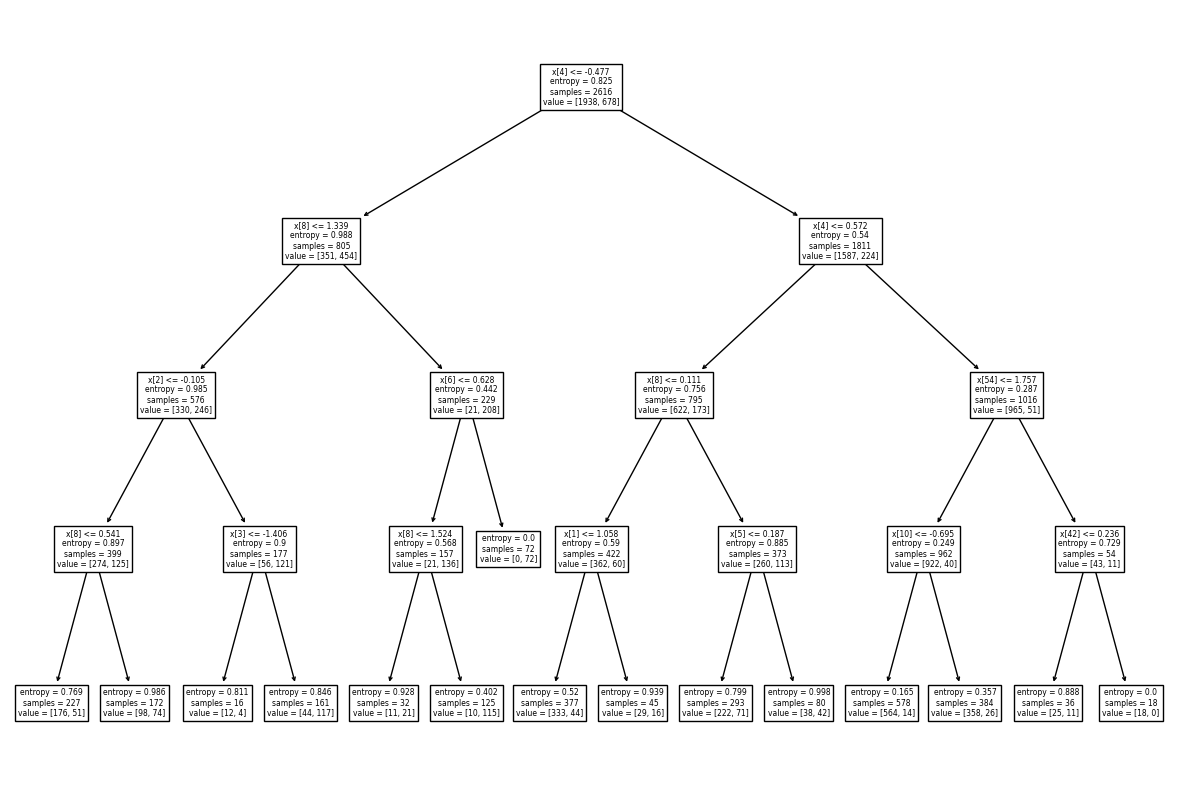

In [102]:
#Create a decision tree picture
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc)

**5. Feature importance plot**

In [103]:
#Create a featureimportance plot
feature_importance = dtc.feature_importances_
feature_importance

array([0.        , 0.01392201, 0.06480111, 0.01319952, 0.61228994,
       0.02094989, 0.01575104, 0.        , 0.22329189, 0.        ,
       0.01000791, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00963018, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0161565 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

<Axes: xlabel='Feature', ylabel='Importance'>

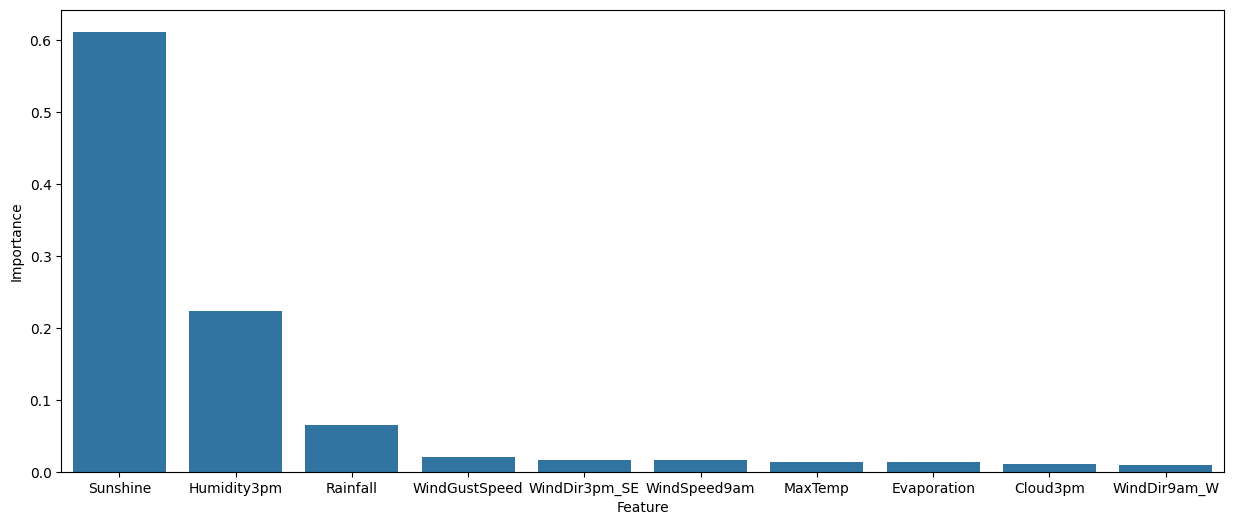

In [124]:
columns = df_pp.drop(['RainTomorrow'], axis=1).columns
dt1 = pd.DataFrame({'Feature': columns, 'Importance': feature_importance})
dt1 = dt1.sort_values(by='Importance', ascending=False)
dt1.reset_index(drop=True, inplace=True)
dt1 = dt1.drop(list(np.arange(10,61)))
plt.figure(figsize=(15,6))
sns.barplot(x='Feature', y='Importance', data=dt1)